In [1]:
#######################################################################################################
### Once RAD reports are aggregated and created for NLP read into this notebook for initial analysis
### See the notebook "RADAnalysisPrototype.ipynb" for logic details of extracting radiology report from sample
### radiology HL7 ORU patient reports.
### Using the RAD MRI report extracted from HL7 ORU to experiment with python NLP lib nltk
#######################################################################################################
import nltk
## Proprietary Dictionaries and Functions
from sam_2018_cpt_rad import * # 2018 RAD CPT codes and search functions

## Read in aggregated RAD report for patient then print out
file = open('PAT3234567890_20110616163020_RADRPT.txt', 'r') 
report = file.read() 
file.close()
print(report)

20110602163020
Imaging Center 123 Main Street Anywhere, USA 01234 Phone 123.456.7890 Fax 123.456.7890
PATIENT: RONALD U SWANSON
DOB: 5/5/1955
FILE #: 12345
PHYSICIAN: REFERRING
EXAM: MRI LEFT FOOT
DATE: 1/1/2011
 CLINICAL INFORMATION:
Left medial foot and ankle pain and swelling. Plantar metatarsal pain for 5 weeks. No known trauma.
COMPARISON:
None
TECHNIQUE:
Sagittal T1 and STIR, short axis PD and STIR, long axis PD FS imaging is performed through the left midfoot and 
forefoot without contrast.
FINDINGS:
There is diffuse marrow edema throughout the proximal phalanx of the second digit. There is no definite fracture 
or cortical disruption identified. There is mild soft tissue edema and swelling along the plantar aspect of the 
second toe and second metatarsophalangeal joint.
The Lisfranc joint and ligament are normal. The metatarsal shafts are normal.
The first metatarsophalangeal joint and hallucal sesamoidal complex appear intact. The flexor and extensor halluces 
longus tendons a

In [2]:
# Tokenize report
tokens = [t for t in report.split()] 
print (tokens)

['20110602163020', 'Imaging', 'Center', '123', 'Main', 'Street', 'Anywhere,', 'USA', '01234', 'Phone', '123.456.7890', 'Fax', '123.456.7890', 'PATIENT:', 'RONALD', 'U', 'SWANSON', 'DOB:', '5/5/1955', 'FILE', '#:', '12345', 'PHYSICIAN:', 'REFERRING', 'EXAM:', 'MRI', 'LEFT', 'FOOT', 'DATE:', '1/1/2011', 'CLINICAL', 'INFORMATION:', 'Left', 'medial', 'foot', 'and', 'ankle', 'pain', 'and', 'swelling.', 'Plantar', 'metatarsal', 'pain', 'for', '5', 'weeks.', 'No', 'known', 'trauma.', 'COMPARISON:', 'None', 'TECHNIQUE:', 'Sagittal', 'T1', 'and', 'STIR,', 'short', 'axis', 'PD', 'and', 'STIR,', 'long', 'axis', 'PD', 'FS', 'imaging', 'is', 'performed', 'through', 'the', 'left', 'midfoot', 'and', 'forefoot', 'without', 'contrast.', 'FINDINGS:', 'There', 'is', 'diffuse', 'marrow', 'edema', 'throughout', 'the', 'proximal', 'phalanx', 'of', 'the', 'second', 'digit.', 'There', 'is', 'no', 'definite', 'fracture', 'or', 'cortical', 'disruption', 'identified.', 'There', 'is', 'mild', 'soft', 'tissue', 'e

In [3]:
# Count frequency of words
freq = nltk.FreqDist(tokens)
for key,val in freq.items():
    print (str(key) + ':' + str(val))

20110602163020:1
Imaging:1
Center:1
123:1
Main:1
Street:1
Anywhere,:1
USA:1
01234:1
Phone:1
123.456.7890:2
Fax:1
PATIENT::1
RONALD:1
U:1
SWANSON:1
DOB::1
5/5/1955:1
FILE:1
#::1
12345:1
PHYSICIAN::1
REFERRING:1
EXAM::1
MRI:1
LEFT:1
FOOT:1
DATE::1
1/1/2011:1
CLINICAL:1
INFORMATION::1
Left:1
medial:3
foot:1
and:18
ankle:1
pain:2
swelling.:1
Plantar:1
metatarsal:2
for:2
5:1
weeks.:1
No:3
known:1
trauma.:1
COMPARISON::1
None:1
TECHNIQUE::1
Sagittal:1
T1:1
STIR,:2
short:1
axis:2
PD:2
long:1
FS:1
imaging:1
is:9
performed:1
through:1
the:17
left:1
midfoot:2
forefoot:1
without:1
contrast.:1
FINDINGS::1
There:8
diffuse:2
marrow:3
edema:5
throughout:1
proximal:2
phalanx:2
of:14
second:7
digit.:2
no:2
definite:2
fracture:2
or:1
cortical:1
disruption:1
identified.:1
mild:3
soft:3
tissue:3
swelling:2
along:2
plantar:4
aspect:4
toe:1
metatarsophalangeal:6
joint.:3
The:6
Lisfranc:1
joint:5
ligament:1
are:5
normal.:5
shafts:1
first:1
hallucal:1
sesamoidal:1
complex:1
appear:2
intact.:1
flexor:2
extenso

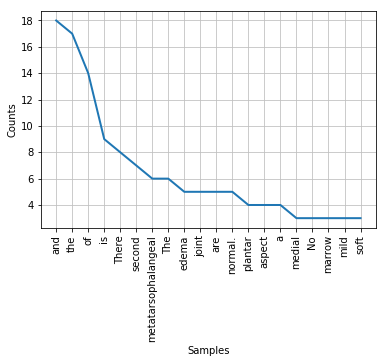

In [5]:
# Plot frequency of words
freq.plot(20, cumulative=False)

In [6]:
# Load stopwords list from nltk to cleanup noise from report
# nltk.download('stopwords') 
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
### Data Normalization
# Make new tokens attay to store converted tokens to all lower case characters
# and remove stopwords from new tokens array
normalized_tokens = [x.lower() for x in tokens[:]]

for token in normalized_tokens:
    if token in stopwords.words('english'):
        normalized_tokens.remove(token)
        print("removing ", token, " from normalized_tokens array")
    else:
        print("=======================> keeping token ", token)
print("---------------------------------------------------")
print(normalized_tokens)

=======================> keeping token  20110602163020
=======================> keeping token  imaging
=======================> keeping token  center
=======================> keeping token  123
=======================> keeping token  main
=======================> keeping token  street
=======================> keeping token  anywhere,
=======================> keeping token  usa
=======================> keeping token  01234
=======================> keeping token  phone
=======================> keeping token  123.456.7890
=======================> keeping token  fax
=======================> keeping token  123.456.7890
=======================> keeping token  patient:
=======================> keeping token  ronald
=======================> keeping token  u
=======================> keeping token  swanson
=======================> keeping token  dob:
=======================> keeping token  5/5/1955
=======================> keeping token  file
=======================> keeping token  #:
==========

In [8]:
print(len(tokens))
print(len(normalized_tokens))

337
260


In [9]:
# Count frequency of each token/word now that report is cleaned of stopwords and nomarlized to lowercase
normalized_freq = nltk.FreqDist(normalized_tokens)
for key,val in normalized_freq.items():
    print (str(key) + ':' + str(val))

20110602163020:1
imaging:2
center:1
123:1
main:1
street:1
anywhere,:1
usa:1
01234:1
phone:1
123.456.7890:2
fax:1
patient::1
ronald:1
u:1
swanson:1
dob::1
5/5/1955:1
file:1
#::1
12345:1
physician::1
referring:1
exam::1
mri:1
left:3
foot:2
date::1
1/1/2011:1
clinical:3
information::1
medial:3
ankle:1
pain:2
swelling.:1
plantar:5
metatarsal:2
5:1
weeks.:1
known:1
trauma.:1
comparison::1
none:1
technique::1
sagittal:1
t1:1
stir,:2
short:1
axis:2
pd:2
long:1
fs:1
performed:1
midfoot:2
forefoot:1
without:1
contrast.:1
findings::1
is:8
diffuse:2
marrow:3
edema:5
throughout:1
proximal:2
phalanx:2
second:7
digit.:2
definite:2
fracture:2
cortical:1
disruption:1
identified.:1
mild:3
soft:3
tissue:3
swelling:2
along:2
aspect:4
toe:1
metatarsophalangeal:6
joint.:3
lisfranc:1
joint:5
ligament:1
normal.:5
shafts:1
first:1
hallucal:1
sesamoidal:1
complex:1
appear:2
intact.:1
flexor:2
extensor:2
halluces:1
longus:1
tendons:2
focal:2
thinning:1
attenuation:1
findings:2
suggestive:2
partial-thickness:2
t

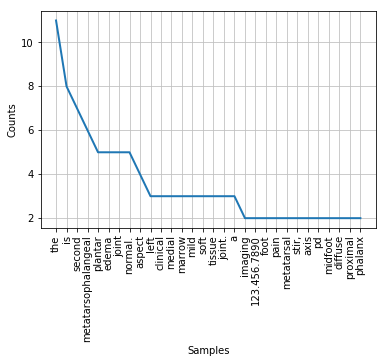

In [10]:
# Plot again with stopwords removed 
normalized_freq.plot(30,cumulative=False)
# Although resulting normalized array of words are less noisy, the frequency doesn't provide obviously useful insight

In [11]:
### Another NLP analysis technique is to try to tokenize by sentences and see if that produces more insight. 
### Tokenize sentences and words from report
#
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

report_sentences = sent_tokenize(report)
print(report_sentences)
print('=========================================')

['20110602163020\nImaging Center 123 Main Street Anywhere, USA 01234 Phone 123.456.7890 Fax 123.456.7890\nPATIENT: RONALD U SWANSON\nDOB: 5/5/1955\nFILE #: 12345\nPHYSICIAN: REFERRING\nEXAM: MRI LEFT FOOT\nDATE: 1/1/2011\n CLINICAL INFORMATION:\nLeft medial foot and ankle pain and swelling.', 'Plantar metatarsal pain for 5 weeks.', 'No known trauma.', 'COMPARISON:\nNone\nTECHNIQUE:\nSagittal T1 and STIR, short axis PD and STIR, long axis PD FS imaging is performed through the left midfoot and \nforefoot without contrast.', 'FINDINGS:\nThere is diffuse marrow edema throughout the proximal phalanx of the second digit.', 'There is no definite fracture \nor cortical disruption identified.', 'There is mild soft tissue edema and swelling along the plantar aspect of the \nsecond toe and second metatarsophalangeal joint.', 'The Lisfranc joint and ligament are normal.', 'The metatarsal shafts are normal.', 'The first metatarsophalangeal joint and hallucal sesamoidal complex appear intact.', 'Th

In [12]:
## Analyzing headers of the report file there is a section that states the imaging procedure and modality used that this document is 
## reporting on. In this case its "MRI ABDOMEN WITH CONTRAST". Using my other notebook with CPT code look ups, this is a CPT code 70551.
report_header = word_tokenize(report_sentences[0])
print(report_header)
print("=========================")
print(report_sentences[0])

['20110602163020', 'Imaging', 'Center', '123', 'Main', 'Street', 'Anywhere', ',', 'USA', '01234', 'Phone', '123.456.7890', 'Fax', '123.456.7890', 'PATIENT', ':', 'RONALD', 'U', 'SWANSON', 'DOB', ':', '5/5/1955', 'FILE', '#', ':', '12345', 'PHYSICIAN', ':', 'REFERRING', 'EXAM', ':', 'MRI', 'LEFT', 'FOOT', 'DATE', ':', '1/1/2011', 'CLINICAL', 'INFORMATION', ':', 'Left', 'medial', 'foot', 'and', 'ankle', 'pain', 'and', 'swelling', '.']
20110602163020
Imaging Center 123 Main Street Anywhere, USA 01234 Phone 123.456.7890 Fax 123.456.7890
PATIENT: RONALD U SWANSON
DOB: 5/5/1955
FILE #: 12345
PHYSICIAN: REFERRING
EXAM: MRI LEFT FOOT
DATE: 1/1/2011
 CLINICAL INFORMATION:
Left medial foot and ankle pain and swelling.


In [14]:
#
## Try gensim and topic modelling techniques next
#  Topic Modeling is a technique to extract the hidden topics from large volumes of text. 
#  Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling with excellent 
#  implementations in the Python’s Gensim package. The challenge, however, is how to extract 
#  good quality of topics that are clear, segregated and meaningful. This depends heavily on 
#  the quality of text preprocessing and the strategy of finding the optimal number of topics. 
#  This tutorial attempts to tackle both of these problems.
#
#  A topic is nothing but a collection of dominant keywords that are typical representatives. 
#  Just by looking at the keywords, you can identify what the topic is all about.
#  The following are key factors to obtaining good segregation topics:
#      The quality of text processing.
#      The variety of topics the text talks about.
#      The choice of topic modeling algorithm.
#      The number of topics fed to the algorithm.
#      The algorithms tuning parameters.

import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samueldomingo02/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# load up libs for gensim and topic modelling
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [16]:
## Prepare stopwords
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [17]:
# Import RAD reports
# We take 1 at first and add on as code develops.
# Import Dataset
#df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
#print(df.target_names.unique())
#print(df.shape)
#print(df.head())
#df[1]
import pandas as pd
df = pd.read_csv('PAT1234567890_20110126163020_RADRPT.txt', sep ='delimiter', header = None)
print(df)

                                                    0
0                                      20110101152535
1   Imaging Center 123 Main Street Anywhere, USA 0...
2                                            PATIENT:
3                                          JOHN SMITH
4                                      DATE: 5/5/1955
5                                               12345
6                                PHYSICIAN: REFERRING
7            EXAM: MRI ABDOMEN WITH CONTRAST 1/1/2011
8                               CLINICAL INFORMATION:
9   History pancreatic cancer. Status post aortic ...
10             Abdominal pain. Follow-up examination.
11                                        COMPARISON:
12  Comparison is made with previous CT scan repor...
13                                          CONTRAST:
14  15 mL of MultiHance was administered per proto...
15                                         TECHNIQUE:
16  Coronal T2-weighted axial and T2; axial T2 fat...
17  dynamic axial T1 fat-sat

/Users/samueldomingo02/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


In [19]:
# Removing any email formatting using regular expressions
# Convert to list
#data = df.content.values.tolist()
data = df.values.tolist()

# Remove Emails
#data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
#data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
#data = [re.sub("\'", "", sent) for sent in data]

#print(data[:1])
print (data)

[['20110101152535'], ['Imaging Center 123 Main Street Anywhere, USA 01234 Phone 123.456.7890 Fax 123.456.7890'], ['PATIENT:'], ['JOHN SMITH'], ['DATE: 5/5/1955'], ['12345'], ['PHYSICIAN: REFERRING'], ['EXAM: MRI ABDOMEN WITH CONTRAST 1/1/2011'], ['CLINICAL INFORMATION:'], ['History pancreatic cancer. Status post aortic chemotherapy and Whipple procedure on DATE. Chronic low back pain.'], ['Abdominal pain. Follow-up examination.'], ['COMPARISON:'], ['Comparison is made with previous CT scan reported DATE and DATE'], ['CONTRAST:'], ['15 mL of MultiHance was administered per protocol.'], ['TECHNIQUE:'], ['Coronal T2-weighted axial and T2; axial T2 fat sat clear, T2 and, T2 gradient-echo, and in phase sequences;'], ['dynamic axial T1 fat-sat post contrast additional subtraction reconstructions; coronal single shot MRCP sequences'], ['FINDINGS'], ['Marked hydronephrosis and hydroureter are present in the right kidney (series 12 images 19-27).'], ['foci in the proximal right ureter (series 6

In [20]:
# Function that will tokenize words from sentences and clean-up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

#print(data_words[:1])
print(data_words)

[[], ['imaging', 'center', 'main', 'street', 'anywhere', 'usa', 'phone', 'fax'], ['patient'], ['john', 'smith'], ['date'], [], ['physician', 'referring'], ['exam', 'mri', 'abdomen', 'with', 'contrast'], ['clinical', 'information'], ['history', 'pancreatic', 'cancer', 'status', 'post', 'aortic', 'chemotherapy', 'and', 'whipple', 'procedure', 'on', 'date', 'chronic', 'low', 'back', 'pain'], ['abdominal', 'pain', 'follow', 'up', 'examination'], ['comparison'], ['comparison', 'is', 'made', 'with', 'previous', 'ct', 'scan', 'reported', 'date', 'and', 'date'], ['contrast'], ['ml', 'of', 'multihance', 'was', 'administered', 'per', 'protocol'], ['technique'], ['coronal', 'weighted', 'axial', 'and', 'axial', 'fat', 'sat', 'clear', 'and', 'gradient', 'echo', 'and', 'in', 'phase', 'sequences'], ['dynamic', 'axial', 'fat', 'sat', 'post', 'contrast', 'additional', 'subtraction', 'reconstructions', 'coronal', 'single', 'shot', 'mrcp', 'sequences'], ['findings'], ['marked', 'hydronephrosis', 'and', '

In [21]:
# Creating Bigram and Trigram Models
# Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.
# Some examples in our example are: ‘front_bumper’, ‘oil_leak’, ‘maryland_college_park’ etc.
# Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important 
# arguments to Phrases are min_count and threshold. The higher the values of these param, the harder it is for 
# words to be combined to bigrams.
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])
print('=========================================')
print(data_words)

[]
[[], ['imaging', 'center', 'main', 'street', 'anywhere', 'usa', 'phone', 'fax'], ['patient'], ['john', 'smith'], ['date'], [], ['physician', 'referring'], ['exam', 'mri', 'abdomen', 'with', 'contrast'], ['clinical', 'information'], ['history', 'pancreatic', 'cancer', 'status', 'post', 'aortic', 'chemotherapy', 'and', 'whipple', 'procedure', 'on', 'date', 'chronic', 'low', 'back', 'pain'], ['abdominal', 'pain', 'follow', 'up', 'examination'], ['comparison'], ['comparison', 'is', 'made', 'with', 'previous', 'ct', 'scan', 'reported', 'date', 'and', 'date'], ['contrast'], ['ml', 'of', 'multihance', 'was', 'administered', 'per', 'protocol'], ['technique'], ['coronal', 'weighted', 'axial', 'and', 'axial', 'fat', 'sat', 'clear', 'and', 'gradient', 'echo', 'and', 'in', 'phase', 'sequences'], ['dynamic', 'axial', 'fat', 'sat', 'post', 'contrast', 'additional', 'subtraction', 'reconstructions', 'coronal', 'single', 'shot', 'mrcp', 'sequences'], ['findings'], ['marked', 'hydronephrosis', 'and'

In [22]:
####
# Functions:
# Remove Stopwords, Make Bigrams and Lemmatize
# The bigrams model is ready. Let’s define the functions to remove the stopwords, make bigrams and lemmatization 
# and call them sequentially.
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [23]:

# call the new functions in order
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[[]]


In [24]:
# Create the Dictionary and Corpus needed for Topic Modeling
# The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[]]


In [25]:
# Gensim creates a unique id for each word in the document. The produced corpus shown above is a 
# mapping of (word_id, word_frequency).
# For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on.
# This is used as the input by the LDA model.
# If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.
id2word[4]

'main'

In [26]:
# OR... Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[]]

In [27]:
# Building the Topic Model
# We have everything required to train the LDA model. In addition to the corpus and dictionary, 
# you need to provide the number of topics as well.
# Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, 
# both defaults to 1.0/num_topics prior.
# chunksize is the number of documents to be used in each training chunk. update_every determines how often the model 
# parameters should be updated and passes is the total number of training passes.

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
print("DONE!!!!")

DONE!!!!


In [29]:
# View the topics in LDA model and weights(of importance)
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.079*"radiologist" + 0.040*"artifact" + 0.040*"foci" + 0.040*"series" + 0.040*"image" + 0.040*"proximal" + 0.040*"flow" + 0.040*"represent" + 0.040*"ureter" + 0.040*"likely"'), (1, '0.170*"date" + 0.058*"report" + 0.058*"scan" + 0.058*"ct" + 0.058*"previous" + 0.058*"make" + 0.058*"comparison" + 0.058*"smith" + 0.003*"duct" + 0.003*"recurrent"'), (2, '0.062*"stone" + 0.062*"lesion" + 0.062*"finding" + 0.032*"interval" + 0.032*"new" + 0.032*"hydroureter" + 0.032*"development" + 0.032*"mass" + 0.032*"hydronephrosis" + 0.032*"right"'), (3, '0.103*"kidney" + 0.053*"right" + 0.053*"leave" + 0.053*"identify" + 0.053*"mass" + 0.053*"masse" + 0.053*"postoperative" + 0.053*"see" + 0.053*"change" + 0.053*"ureter"'), (4, '0.081*"leave" + 0.081*"pelviectasis" + 0.081*"mild" + 0.081*"kidney" + 0.081*"stable" + 0.004*"masse" + 0.004*"postoperative" + 0.004*"see" + 0.004*"cholecystectomy" + 0.004*"dilatation"'), (5, '0.034*"date" + 0.034*"pancreatic" + 0.034*"pain" + 0.034*"cancer" + 0.034*"ch

In [30]:
# How to interpret this?
# Topic 0 is represented as _0.016“car” + 0.014“power” + 0.010“light” + 0.009“drive” + 0.007“mount” 
#                             + 0.007“controller” + 0.007“cool” + 0.007“engine” + 0.007“back” + ‘0.006“turn”.
# It means the top 10 keywords that contribute to this topic are: ‘car’, ‘power’, ‘light’.. and so on and the weight of ‘car’ on topic 0 is 0.016.
# The weights reflect how important a keyword is to that topic.
# Looking at these keywords, can you guess what this topic could be? You may summarise it either are ‘cars’ or ‘automobiles’.
# Likewise, can you go through the remaining topic keywords and judge what the topic is?

In [32]:
# Compute Model Perplexity and Coherence Score
# Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 
# In my experience, topic coherence score, in particular, has been more helpful.

# Compute Perplexity
print("working...")
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
print("\nworking.....")
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

working...

Perplexity:  -6.125900460141046

working.....

Coherence Score:  0.3890626786157424


In [33]:
# Visualize the topics-keywords
# Visualize the topics
print("enabling notebook")
pyLDAvis.enable_notebook()
print("creating incentive chart")
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
print("displaying")
vis

enabling notebook
creating incentive chart
displaying


/Users/samueldomingo02/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
19     0.029447 -0.101742       1        1  9.035067
15     0.156561  0.132438       2        1  8.831477
2      0.042082 -0.107849       3        1  8.811869
5     -0.082853 -0.099538       4        1  8.391479
6     -0.138964  0.077145       5        1  7.543057
13    -0.000386 -0.124447       6        1  6.932072
0      0.132030  0.075476       7        1  6.417566
9     -0.120669  0.093715       8        1  5.313270
8     -0.115529  0.134178       9        1  5.197829
7      0.153140  0.075415      10        1  4.767711
10     0.088918 -0.041068      11        1  4.752524
3      0.041161 -0.084892      12        1  4.463854
18    -0.026865 -0.075668      13        1  3.734773
1     -0.016505 -0.000641      14        1  3.619486
14     0.004982  0.042108      15        1  3.124903
17    -0.032441 -0.019498      16        1  3.007596
4      0.002813 -0.007237      17        1  2.038461
12    -0.035273  0.014490      18        1  1.679890
16    -0.056200  0.007771      19        1  1.679890
11    -0.025450  0.009846      20        1  0.657223, topic_info=    Category      Freq            Term     Total  loglift  logprob
10   Default  2.000000            date  2.000000  30.0000  30.0000
66   Default  4.000000          kidney  4.000000  29.0000  29.0000
92   Default  2.000000           leave  2.000000  28.0000  28.0000
32   Default  2.000000       abdominal  2.000000  27.0000  27.0000
3    Default  5.000000           image  5.000000  26.0000  26.0000
106  Default  3.000000             see  3.000000  25.0000  25.0000
95   Default  2.000000            mild  2.000000  24.0000  24.0000
67   Default  3.000000            mark  3.000000  23.0000  23.0000
125  Default  2.000000           bowel  2.000000  22.0000  22.0000
46   Default  2.000000           axial  2.000000  21.0000  21.0000
70   Default  4.000000          series  4.000000  20.0000  20.0000
38   Default  3.000000        previous  3.000000  19.0000  19.0000
35   Default  2.000000      comparison  2.000000  18.0000  18.0000
69   Default  5.000000           right  5.000000  17.0000  17.0000
26   Default  1.000000            pain  1.000000  16.0000  16.0000
33   Default  1.000000     examination  1.000000  15.0000  15.0000
78   Default  3.000000          ureter  3.000000  14.0000  14.0000
103  Default  3.000000            mass  3.000000  13.0000  13.0000
97   Default  1.000000    pelviectasis  1.000000  12.0000  12.0000
100  Default  1.000000          stable  1.000000  11.0000  11.0000
39   Default  2.000000          report  2.000000  10.0000  10.0000
111  Default  2.000000            duct  2.000000   9.0000   9.0000
40   Default  2.000000            scan  2.000000   8.0000   8.0000
80   Default  2.000000          distal  2.000000   7.0000   7.0000
14   Default  4.000000        contrast  4.000000   6.0000   6.0000
45   Default  0.000000       technique  0.000000   5.0000   5.0000
31   Default  2.000000         whipple  2.000000   4.0000   4.0000
29   Default  2.000000       procedure  2.000000   3.0000   3.0000
155  Default  1.000000     radiologist  1.000000   2.0000   2.0000
102  Default  2.000000        identify  2.000000   1.0000   1.0000
..       ...       ...             ...       ...      ...      ...
104  Topic20  0.010024           masse  1.197902   0.2415  -5.1874
156  Topic20  0.010024  electronically  1.208340   0.2328  -5.1874
157  Topic20  0.010024            sign  1.208340   0.2328  -5.1874
151  Topic20  0.010024            wall  1.229540   0.2154  -5.1874
138  Topic20  0.010024      impression  1.229551   0.2154  -5.1874
55   Topic20  0.010024          weight  1.229555   0.2154  -5.1874
47   Topic20  0.010024           clear  1.229555   0.2154  -5.1874
49   Topic20  0.010024            echo  1.229555   0.2154  -5.1874
158  Topic20  0.010024         approve  1.262200   0.1892  -5.1874
56   Topic20  0.010024      additional  1.24

In [34]:
# Building LDA Mallet Model

# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

/Users/samueldomingo02/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CalledProcessError: Command 'path/to/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/vc/g3vnp0h97x382zs2z74d5_cr0000gn/T/2c3103_corpus.txt --output /var/folders/vc/g3vnp0h97x382zs2z74d5_cr0000gn/T/2c3103_corpus.mallet' returned non-zero exit status 127.